In [1]:
import cv2
import numpy as np
import glob
from scipy.signal import find_peaks
import os
import sys
import matplotlib.pyplot as plt

In [7]:
image_path = r"C:\Users\Pannawit\Documents\GitHub\NARIT_Project\1tick_1\1tick_1"
file_pattern = os.path.join(image_path, "image_*.png")

In [8]:
file_list = glob.glob(file_pattern)

file_list.sort()
all_images = [cv2.imread(f, cv2.IMREAD_GRAYSCALE) for f in file_list]
print(f"พบไฟล์ทั้งหมด {len(all_images)} ไฟล์.")

พบไฟล์ทั้งหมด 240 ไฟล์.


In [9]:
h, w = all_images[0].shape
mid_y = h // 2
mid_x = w // 2 # ตีเส้นกลางจอ

In [10]:
intensity_timeseries = [img[mid_y, mid_x] for img in all_images]
intensity_timeseries = np.array(intensity_timeseries)

In [11]:
MIN_FRAME_DISTANCE = 1
MIN_PROMINENCE = 1

In [12]:
if np.max(intensity_timeseries) == np.min(intensity_timeseries):
    print("เกิดข้อผิดพลาด: สัญญาณความสว่างไม่เปลี่ยนแปลงเลยตลอด 240 เฟรม!")
    sys.exit()

In [13]:
minima_indices, properties = find_peaks(-intensity_timeseries, 
                                        distance=MIN_FRAME_DISTANCE,
                                        prominence=MIN_PROMINENCE)

In [15]:
count = len(minima_indices)

print(f"\n--- 📊 ผลการนับ (Event Counting - เกณฑ์ต่ำ) ---")
print(f"วิเคราะห์สัญญาณที่จุด (Y={mid_y}, X={mid_x})")
print(f"ตั้งค่า: หุบเขาต้องห่างกันอย่างน้อย {MIN_FRAME_DISTANCE} เฟรม")
print(f"ตั้งค่า: หุบเขาต้องลึกอย่างน้อย {MIN_PROMINENCE:.2f}")
print("------------------------------------------")
print(f"จำนวนแถบมืดที่นับได้ (รวม): {count} แถบ")
print("------------------------------------------")

print("\n🔍 รายการเฟรมที่ตรวจพบ 'แถบมืด' ผ่านจุดเซ็นเซอร์:")
for i in minima_indices:
    print(f"  - Frame {i:04d} (image_{i:04d}.png)")


--- 📊 ผลการนับ (Event Counting - เกณฑ์ต่ำ) ---
วิเคราะห์สัญญาณที่จุด (Y=200, X=500)
ตั้งค่า: หุบเขาต้องห่างกันอย่างน้อย 1 เฟรม
ตั้งค่า: หุบเขาต้องลึกอย่างน้อย 1.00
------------------------------------------
จำนวนแถบมืดที่นับได้ (รวม): 70 แถบ
------------------------------------------

🔍 รายการเฟรมที่ตรวจพบ 'แถบมืด' ผ่านจุดเซ็นเซอร์:
  - Frame 0002 (image_0002.png)
  - Frame 0004 (image_0004.png)
  - Frame 0008 (image_0008.png)
  - Frame 0012 (image_0012.png)
  - Frame 0017 (image_0017.png)
  - Frame 0024 (image_0024.png)
  - Frame 0026 (image_0026.png)
  - Frame 0028 (image_0028.png)
  - Frame 0038 (image_0038.png)
  - Frame 0041 (image_0041.png)
  - Frame 0044 (image_0044.png)
  - Frame 0052 (image_0052.png)
  - Frame 0058 (image_0058.png)
  - Frame 0063 (image_0063.png)
  - Frame 0068 (image_0068.png)
  - Frame 0070 (image_0070.png)
  - Frame 0072 (image_0072.png)
  - Frame 0074 (image_0074.png)
  - Frame 0077 (image_0077.png)
  - Frame 0080 (image_0080.png)
  - Frame 0084 (image_00


กำลังสร้างกราฟหลักฐานการนับ...


C:\Users\Pannawit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3597 (\N{THAI CHARACTER YO YING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Pannawit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3603 (\N{THAI CHARACTER NO NEN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Pannawit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3649 (\N{THAI CHARACTER SARA AE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Pannawit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\

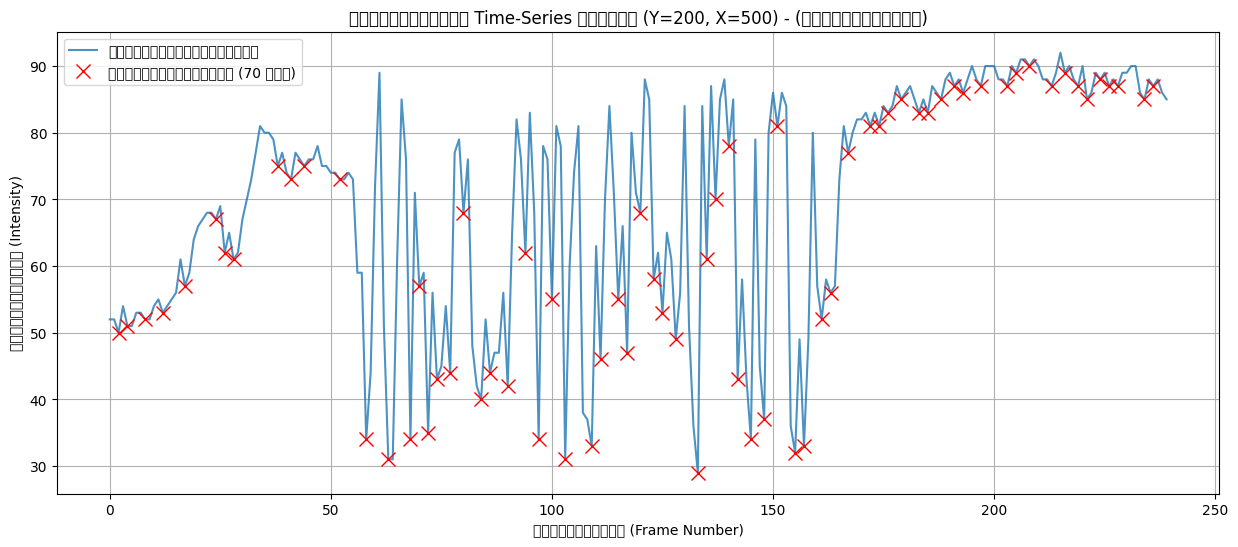

In [16]:
print("\nกำลังสร้างกราฟหลักฐานการนับ...")
plt.figure(figsize=(15, 6))
plt.title(f"การวิเคราะห์ Time-Series ที่จุด (Y={mid_y}, X={mid_x}) - (นับทุกหุบเขา)")
plt.xlabel("หมายเลขเฟรม (Frame Number)")
plt.ylabel("ค่าความสว่าง (Intensity)")

plt.plot(intensity_timeseries, label="สัญญาณความสว่างดิบ", alpha=0.8)

plt.plot(minima_indices, intensity_timeseries[minima_indices], "xr", 
         markersize=10, label=f"แถบมืดที่นับได้ ({count} จุด)")

plt.legend()
plt.grid(True)
plt.show()